In [625]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import matplotlib.patches as mpatches
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as st
import warnings
import scikit_posthocs as sp
warnings.filterwarnings("ignore", category=FutureWarning) 

## Оценка рамеров ран

In [626]:
df = pd.read_excel('./Гели-кожа, цифры.xlsx', sheet_name='Планиметрия расчет')
df = df.fillna(True)
df = df.rename(columns={'Группа': 'group'}, )
df = df.drop([71, 72, 73])
df.head(20)


,group,planimetry_1,planimetry_2,planimetry_3,planimetry_4,planimetry_5
0,СДК_minus,19.278152,True,True,True,True
1,СДК_minus,18.611277,16.50331,11.323275,True,True
2,СДК_minus,20.649486,True,9.646226,True,True
3,СДК_minus,22.363243,21.55337,11.169624,True,True
4,СДК_minus,20.365795,18.653324,10.432006,True,True
5,СДК_minus,21.053314,17.126506,12.408596,True,True
6,СДК_minus,21.458922,17.609928,8.186286,4.037247,True
7,СДК_minus,21.905879,19.023318,13.646446,5.652687,True
8,СДК_minus,24.090276,16.991568,10.553715,4.71331,True
9,СДК_minus,20.881803,15.867445,10.271474,4.135754,True


In [627]:
# First planimetry

rat_wo_diabetes_1 = df[(df['group'] == 'СДК_minus')]['planimetry_1']
rat_w_diabetes_1 = df[df['group'] == 'СДК_plus']['planimetry_1']
control_gel_1 = df[df['group'] == 'ГКЦ']['planimetry_1']
treatment_1 = df[df['group'] == 'ГОЦ']['planimetry_1']
groups_first_planimetry = [rat_wo_diabetes_1, rat_w_diabetes_1, control_gel_1, treatment_1]


# Second planimetry

rat_wo_diabetes_2 = df[(df['group'] == 'СДК_minus')]['planimetry_2']
rat_w_diabetes_2 = df[df['group'] == 'СДК_plus']['planimetry_2']
control_gel_2 = df[df['group'] == 'ГКЦ']['planimetry_2']
treatment_2 = df[df['group'] == 'ГОЦ']['planimetry_2']
groups_second_planimetry = [rat_wo_diabetes_2, rat_w_diabetes_2, control_gel_2, treatment_2]

# Third planimetry

rat_wo_diabetes_3 = df[(df['group'] == 'СДК_minus')]['planimetry_3']
rat_w_diabetes_3 = df[df['group'] == 'СДК_plus']['planimetry_3']
control_gel_3 = df[df['group'] == 'ГКЦ']['planimetry_3']
treatment_3 = df[df['group'] == 'ГОЦ']['planimetry_3']
groups_third_planimetry = [rat_wo_diabetes_3, rat_w_diabetes_3, control_gel_3, treatment_3]

# Fourth planimetry

rat_wo_diabetes_4 = df[(df['group'] == 'СДК_minus')]['planimetry_4']
rat_w_diabetes_4 = df[df['group'] == 'СДК_plus']['planimetry_4']
control_gel_4 = df[df['group'] == 'ГКЦ']['planimetry_4']
treatment_4 = df[df['group'] == 'ГОЦ']['planimetry_4']
groups_fourth_planimetry = [rat_wo_diabetes_4, rat_w_diabetes_4, control_gel_4, treatment_4]

# Fifth planimetry

rat_wo_diabetes_5 = df[(df['group'] == 'СДК_minus')]['planimetry_5']
rat_w_diabetes_5 = df[df['group'] == 'СДК_plus']['planimetry_5']
control_gel_5 = df[df['group'] == 'ГКЦ']['planimetry_5']
treatment_5 = df[df['group'] == 'ГОЦ']['planimetry_5']
groups_fifth_planimetry = [rat_wo_diabetes_5, rat_w_diabetes_5, control_gel_5, treatment_5]



In [628]:
first_planimetry = df.groupby('group', as_index=False).agg({'planimetry_1': 'mean'}).transpose()
second_planimetry = df.groupby('group', as_index=False).agg({'planimetry_2': 'mean'}).transpose()
third_planimetry = df.groupby('group', as_index=False).agg({'planimetry_3': 'mean'}).transpose()
fourth_planimetry = df.groupby('group', as_index=False).agg({'planimetry_4': 'mean'}).transpose()
fifth_planimetry = df.groupby('group', as_index=False).agg({'planimetry_5': 'mean'}).transpose()
planimetryies = [first_planimetry, second_planimetry, third_planimetry, fourth_planimetry, fifth_planimetry]


In [629]:
def data_prepare(*args):
    tables = []
    for a in args:
        a.columns = a.iloc[0]
        a = a[1:]
        tables.append(a)
    return tables

tables = data_prepare(*planimetryies)

In [630]:
new_df = pd.concat(tables)
new_df = new_df.rename(columns={'group':'Группа', 'ГКЦ':'Гель-контроль', 'ГОЦ':'Гель-опыт', 'СДК_minus':'Здоровый контроль', 'СДК_plus':'Диабет контроль'})
new_df = new_df.reset_index()
new_df

group,index,Гель-контроль,Гель-опыт,Здоровый контроль,Диабет контроль
0,planimetry_1,19.577816,21.010876,21.853111,22.134498
1,planimetry_2,15.879983,13.983225,16.022701,18.884793
2,planimetry_3,9.365667,9.792676,10.629085,12.924717
3,planimetry_4,3.658429,3.488863,3.349794,5.169785
4,planimetry_5,1.200705,1.451812,1.345653,1.569576


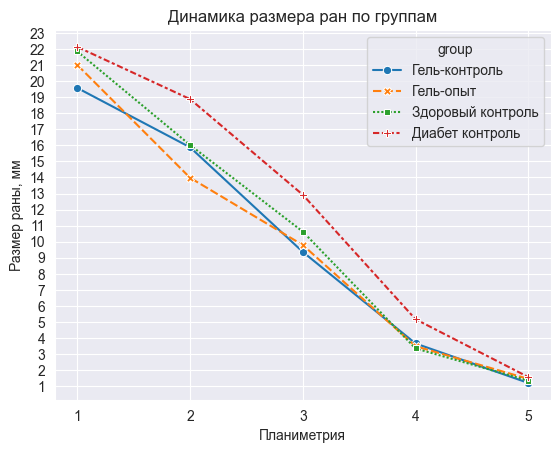

In [631]:
x = [1,2,3,4,5]
plt.title("Динамика размера ран по группам")
plt.xlabel("Планиметрия")
plt.ylabel("Размер раны, мм")

plt.xticks(np.arange(0, 5, step=1), labels=[1,2,3,4,5])
plt.yticks(np.arange(0, 26, step=1))

sns.lineplot(data=new_df, markers=True)
sns.set_style('darkgrid')
plt.show()

# Первая планиметрия

In [632]:
rwod = pd.DataFrame(rat_wo_diabetes_1.reset_index().drop(columns='index').rename(columns={'planimetry_1': 'Health_control, n=17'}))
rwd = pd.DataFrame(rat_w_diabetes_1.reset_index().drop(columns='index').rename(columns={'planimetry_1': 'Diabetes, n=16'}))
cg = pd.DataFrame(control_gel_1.reset_index().drop(columns='index').rename(columns={'planimetry_1': 'Gel_control, n=16'}))
tr = pd.DataFrame(treatment_1.reset_index().drop(columns='index').rename(columns={'planimetry_1': 'Treatment, n=17'}))

combined_df_1 = pd.concat([rwod, rwd, cg, tr], axis=1)
combined_df_1.replace(True, None, inplace=True)


# С,рос индексов после о,ъединения
combined_df_1 = combined_df_1.reset_index(drop=True)

combined_df_1.head(20)


,"Health_control, n=17","Diabetes, n=16","Gel_control, n=16","Treatment, n=17"
0,19.278152,23.406379,23.36,20.93201
1,18.611277,23.329514,23.91,18.091276
2,20.649486,22.570625,24.07,20.099149
3,22.363243,24.519978,20.55,21.543498
4,20.365795,21.959024,19.08,21.040997
5,21.053314,26.864747,20.19,21.519921
6,21.458922,22.22356,None,21.907798
7,21.905879,23.404883,24.832124,18.060056
8,24.090276,21.301446,22.970183,18.792057
9,20.881803,21.019191,22.338194,20.417427


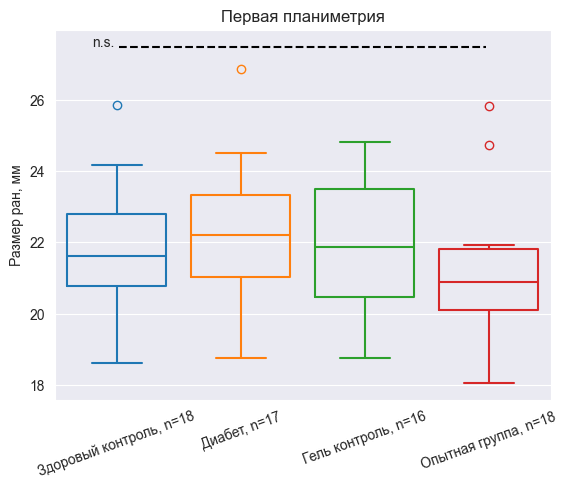

In [633]:
# Boxplot for first planimetry

plt.title("Первая планиметрия")
plt.ylabel('Размер ран, мм')
plt.xticks(np.arange(0, 3, step=1))  # Set label locations.
plt.xticks(np.arange(4), ['Здоровый контроль, n=18', 'Диабет, n=17', 'Гель контроль, n=16', 'Опытная группа, n=18'], rotation=20)

plt.axhline(y=27.5, xmin=0.13, xmax=0.87, linestyle='--', c='black')
plt.text(x=-0.2, y=27.5, s='n.s.')

sns.boxplot(data=combined_df_1, fill=False)
plt.show() 

Оценим статистические показатели для первой планиметрии

In [634]:
# Normal distribution check
norm_rwod = st.shapiro(rwod)
norm_rwd = st.shapiro(rwd)
norm_cg = st.shapiro(cg)
norm_tr = st.shapiro(tr)
f'health: {norm_rwod.pvalue}, diabetes: {norm_rwd.pvalue}, gel: {norm_cg.pvalue}, treatment: {norm_tr.pvalue}'
# Distribution in samples is normal not in all samples


'health: 0.963703453540802, diabetes: 0.5282572507858276, gel: 1.2082807188562583e-05, treatment: 0.08483181893825531'

In [635]:
# Рассчитаем IQR для Health_control
def IQR(df, i):
    qu_25 = df[i].quantile(.25)
    qu_75 = df[i].quantile(.75)
    upper_limit = qu_75 + (1.5*(qu_75-qu_25))
    lower_limit = qu_25 - (1.5*(qu_75-qu_25))
    return upper_limit, lower_limit

a, b = IQR(combined_df_1, 'Health_control, n=17')
a, b

(25.80391695533117, 17.767771560887635)

In [636]:
# Kruskal test for identification of differencies in samples
diabetes_1 = pd.DataFrame([23.40637945, 23.3295144, 22.57062518, 24.51997756, 21.9590238, 26.86474734, 22.22356012, 23.40488272, 21.30144578, 21.0191905, 22.43950111, 20.55937494, 20.61024419, 22.35338644, 18.80930113, 18.76176489, 22.15])

gel_1 = pd.DataFrame([23.36, 23.91, 24.07, 20.55, 19.08, 20.19, 24.83212425, 22.97018283, 22.33819385, 20.93630011, 18.76179884, 21.69777939, 20.9761466, 19.86226458, 22.06394875, 24.80194157])

ul_health, ll_health = IQR(combined_df_1, 'Health_control, n=17')
ul_diabetes, ll_diabetes = IQR(diabetes_1, 0)
ul_gel, ll_gel = IQR(gel_1, 0)
ul_treatment, ll_treatment = IQR(combined_df_1, 'Treatment, n=17')

st.kruskal(combined_df_1[(combined_df_1['Health_control, n=17'] < ul_health) & (combined_df_1['Health_control, n=17'] >ll_health)]['Health_control, n=17'], diabetes_1[(diabetes_1[0] > ll_diabetes) & (diabetes_1[0] < ul_diabetes)][0], gel_1[(gel_1[0] > ll_gel) & (gel_1[0] < ul_gel)][0], combined_df_1[(combined_df_1['Treatment, n=17'] > ll_treatment) & (combined_df_1['Treatment, n=17'] < ul_treatment)]['Treatment, n=17'])


KruskalResult(statistic=8.27163718634307, pvalue=0.04071902101878191)

In [637]:
sp.posthoc_dunn([combined_df_1[(combined_df_1['Health_control, n=17'] < ul_health) & (combined_df_1['Health_control, n=17'] >ll_health)]['Health_control, n=17'], diabetes_1[(diabetes_1[0] > ll_diabetes) & (diabetes_1[0] < ul_diabetes)][0], gel_1[(gel_1[0] > ll_gel) & (gel_1[0] < ul_gel)][0], combined_df_1[(combined_df_1['Treatment, n=17'] > ll_treatment) & (combined_df_1['Treatment, n=17'] < ul_treatment)]['Treatment, n=17']], p_adjust='holm')

,1,2,3,4
1,1.000000,1.000000,1.000000,0.164812
2,1.000000,1.000000,1.000000,0.059202
3,1.000000,1.000000,1.000000,0.104629
4,0.164812,0.059202,0.104629,1.000000


# Вторая планиметрия

In [638]:
rwod_2 = pd.DataFrame(rat_wo_diabetes_2.reset_index().drop(
    columns='index').rename(columns={'planimetry_2': 'Health_control, n=16'}))
rwd_2 = pd.DataFrame(rat_w_diabetes_2.reset_index().drop(
    columns='index').rename(columns={'planimetry_2': 'Diabetes, n=16'}))
cg_2 = pd.DataFrame(control_gel_2.reset_index().drop(
    columns='index').rename(columns={'planimetry_2': 'Gel_control, n=15'}))
tr_2 = pd.DataFrame(treatment_2.reset_index().drop(
    columns='index').rename(columns={'planimetry_2': 'Treatment, n=12'}))

combined_df_2 = pd.concat([rwod_2, rwd_2, cg_2, tr_2], axis=1)
combined_df_2.replace(True, None, inplace=True)

# Срос индексов после оъединения
combined_df_2 = combined_df_2.reset_index(drop=True)
# Заменим значения True на NA для корректной статистики
# values = {'Health_control, n=16': combined_df_2['Health_control, n=16'].mean(), 'Diabetes, n=16': combined_df_2['Diabetes, n=16'].mean(
# ), 'Gel_control, n=15': combined_df_2['Gel_control, n=15'].mean(), 'Treatment, n=12': combined_df_2['Treatment, n=12'].mean()}
# combined_df_2 = combined_df_2.fillna(value=values)
combined_df_2

,"Health_control, n=16","Diabetes, n=16","Gel_control, n=15","Treatment, n=12"
0,None,16.457937,19.03,23.438903
1,16.50331,24.774216,19.89,19.493425
2,None,15.925503,18.11,None
3,21.55337,22.652653,16.84,None
4,18.653324,18.352667,15.91,20.491943
5,17.126506,24.175526,16.72,17.961636
6,17.609928,19.71953,15.049049,19.319044
7,19.023318,22.853926,21.914513,None
8,16.991568,21.273829,23.637334,19.670664
9,15.867445,17.884662,16.0951,16.467184


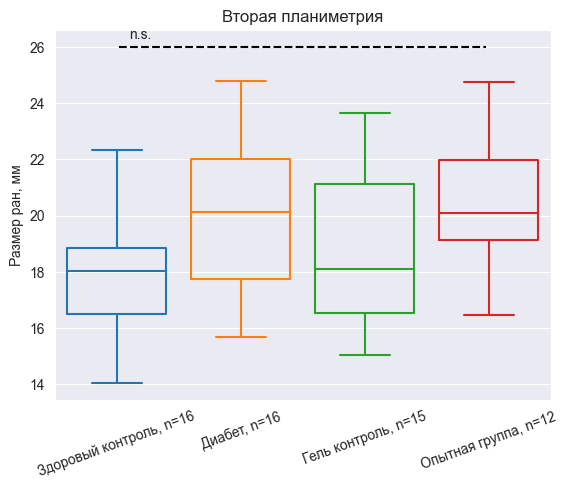

In [639]:
# Boxplot for first planimetry

plt.title("Вторая планиметрия")
plt.yticks(np.arange(0, 28, step=2))
plt.ylabel('Размер ран, мм')
plt.xticks(np.arange(0, 3, step=1))  # Set label locations.
plt.xticks(np.arange(4), ['Здоровый контроль, n=16', 'Диабет, n=16', 'Гель контроль, n=15', 'Опытная группа, n=12'], rotation=20)

sns.boxplot(data=combined_df_2, fill=False, showmeans=False)
plt.axhline(y=26, xmin=0.13, xmax=0.87, linestyle='--', c='black')
plt.text(x=0.1, y=26.3, s='n.s.')

plt.show()

Оценка статистических показателей

In [640]:
# Normal distribution check
norm_rwod_2 = st.shapiro(rwod_2)
norm_rwd_2 = st.shapiro(rwd_2)
norm_cg_2 = st.shapiro(cg_2)
norm_tr_2 = st.shapiro(tr_2)
f'health: {norm_rwod_2.pvalue}, diabetes: {norm_rwd_2.pvalue}, gel: {norm_cg_2.pvalue}, treatment: {norm_tr_2.pvalue}'
# Distribution in samples is not normal

'health: 0.00011095475929323584, diabetes: 0.0007289499044418335, gel: 0.0006999402539804578, treatment: 0.0003565394436009228'

In [641]:
# Kruskal test for identification of differencies in samples

health_control_2 = np.array([16.50330984, 21.55337029, 18.65332402, 17.1265057, 17.60992772, 19.02331791, 16.99156779, 15.86744454, 14.05874844, 22.33565599, 19.37760872, 14.77271542, 16.47692848, 18.78805692, 18.79822461, 18.47191016])

diabetes_2 = np.array([16.45793712, 24.7742161, 15.92550332, 22.65265272, 18.3526669, 24.17552587, 19.71953023, 22.8539255, 21.2738289, 17.88466233, 17.34758927, 20.51018079, 21.79706636, 19.7285399, 20.88674343, 15.7009067])

gel_1 = np.array([19.03, 19.89, 18.11, 16.84, 15.91, 16.72, 15.04904932, 21.91451254, 23.63733417, 16.09509954, 16.34052444, 23.45468595, 20.30728902, 17.35280223, 22.18839428])
treatment_group_2 = [23.43890282, 19.49342532, 20.49194342, 17.9616364, 19.31904443, 19.67066425, 16.46718412, 21.89837559, 22.25277482, 18.56645835, 21.38750752, 24.75013993]

st.kruskal(health_control_2, diabetes_2, gel_1, treatment_group_2) # there's statistical differencies

KruskalResult(statistic=7.154293785310728, pvalue=0.06713916601922938)

# Третья планиметрия

In [642]:
rwod_3 = pd.DataFrame(rat_wo_diabetes_3.reset_index().drop(columns='index').rename(columns={'planimetry_3': 'Health_control, n=17'}))
rwd_3 = pd.DataFrame(rat_w_diabetes_3.reset_index().drop(columns='index').rename(columns={'planimetry_3': 'Diabetes, n=16'}))
cg_3 = pd.DataFrame(control_gel_3.reset_index().drop(columns='index').rename(columns={'planimetry_3': 'Gel_control, n=10'}))
tr_3 = pd.DataFrame(treatment_3.reset_index().drop(columns='index').rename(columns={'planimetry_3': 'Treatment, n=12'}))

combined_df_3 = pd.concat([rwod_3, rwd_3, cg_3, tr_3], axis=1)
combined_df_3.replace(True, pd.NA, inplace=True)

# Срос индексов после о,ъединения
combined_df_3 = combined_df_3.reset_index(drop=True)

# Заменим значения True на NA для корректной статистики
combined_df_3.replace(True, pd.NA, inplace=True)

combined_df_3


,"Health_control, n=17","Diabetes, n=16","Gel_control, n=10","Treatment, n=12"
0,<NA>,9.95493,<NA>,12.874752
1,11.323275,<NA>,<NA>,12.136642
2,9.646226,12.906671,<NA>,<NA>
3,11.169624,14.378372,<NA>,12.015754
4,10.432006,9.903933,<NA>,<NA>
5,12.408596,14.615104,<NA>,13.475006
6,8.186286,15.854715,13.254827,12.86723
7,13.646446,17.199874,19.307403,<NA>
8,10.553715,19.204266,18.371884,15.364033
9,10.271474,10.501016,22.058752,12.472032


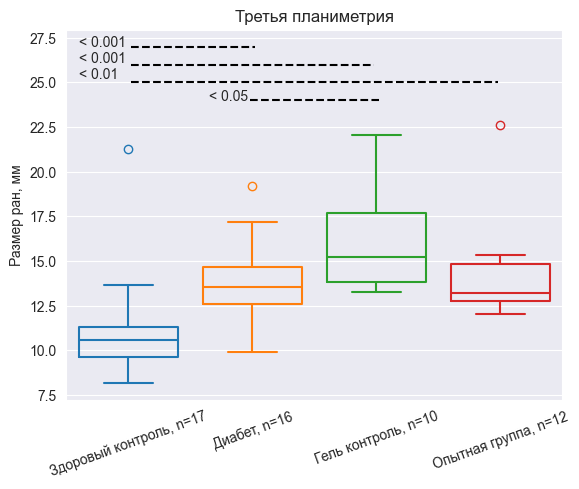

In [643]:
# Boxplot for first planimetry

plt.title("Третья планиметрия")
plt.ylabel('Размер ран, мм')
plt.xticks(np.arange(0, 3, step=1))  # Set label locations.
plt.xticks(np.arange(4), ['Здоровый контроль, n=17', 'Диабет, n=16', 'Гель контроль, n=10', 'Опытная группа, n=12'], rotation=20)

plt.axhline(y=27, xmin=0.13, xmax=0.38, linestyle='--', c='black')
plt.text(x=-0.4, y=27, s='< 0.001')

plt.axhline(y=26, xmin=0.13, xmax=0.62, linestyle='--', c='black')
plt.text(x=-0.4, y=26.1, s='< 0.001')

plt.axhline(y=25, xmin=0.13, xmax=0.87, linestyle='--', c='black')
plt.text(x=-0.4, y=25.2, s='< 0.01')

plt.axhline(y=24, xmin=0.37, xmax=0.63, linestyle='--', c='black')
plt.text(x=0.65, y=24, s='< 0.05')

sns.boxplot(data=combined_df_3, fill=False, showmeans=False)
plt.show()

Оценка статистических показателей

In [644]:
# Normal distribution check
norm_rwod_3 = st.shapiro(rwod_3)
norm_rwd_3 = st.shapiro(rwd_3)
norm_cg_3 = st.shapiro(cg_3)
norm_tr_3 = st.shapiro(tr_3)
f'health: {norm_rwod_3.pvalue}, diabetes: {norm_rwd_3.pvalue}, gel: {norm_cg_3.pvalue}, treatment: {norm_tr_3.pvalue}'
# Distribution in samples is not normal

'health: 0.0012164526851847768, diabetes: 0.014118853025138378, gel: 0.0013179682428017259, treatment: 0.002025715308263898'

In [645]:
# Kruskal test for identification of differencies in samples
health_control_3 = sorted(np.array([11.32327517, 9.646226284, 11.16962441, 10.43200612, 12.40859575, 8.186286498, 13.64644561, 10.55371459, 10.27147432, 9.235834393, 21.26661209, 11.47892003, 10.2411579, 9.096230058, 9.216504166, 10.25484195, 11.21282251]))

diabetes_3 = sorted(np.array([9.954930283, 12.90667136, 14.37837194, 9.903933466, 14.61510431, 15.85471458, 17.19987409, 19.20426572, 10.50101603, 13.28410764, 12.17494556, 14.14546809, 12.72742162, 13.12298514, 13.83432452, 14.91205642]))

gel_3 = sorted(np.array([13.25482727, 19.30740263, 18.37188381, 22.05875189, 15.70216424, 14.41588826, 15.3112506, 15.19591799, 13.33120471, 13.63271636]))

treatment_group_3 = sorted(np.array([12.87475187, 12.13664242, 12.01575399, 13.47500635, 12.86722989, 15.36403278, 12.47203241, 12.95509147, 13.75564736, 14.90616083, 14.83772091, 22.60809843]))

st.kruskal(health_control_3[0:16], diabetes_3[:-1], gel_3, treatment_group_3[:-1])


KruskalResult(statistic=27.620551853806575, pvalue=4.362912998307019e-06)

In [646]:
sp.posthoc_dunn([health_control_3[0:16], diabetes_3[:-1], gel_3, treatment_group_3[:-1]], p_adjust='holm')


,1,2,3,4
1,1.000000,0.004462,0.000003,0.006699
2,0.004462,1.000000,0.126713,0.926154
3,0.000003,0.126713,1.000000,0.139471
4,0.006699,0.926154,0.139471,1.000000


# Четвертая планиметрия

In [647]:
rwod_4 = pd.DataFrame(rat_wo_diabetes_4.reset_index().drop(columns='index').rename(columns={'planimetry_4': 'Health_control, n=11'}))
rwd_4 = pd.DataFrame(rat_w_diabetes_4.reset_index().drop(columns='index').rename(columns={'planimetry_4': 'Diabetes, n=11'}))
cg_4 = pd.DataFrame(control_gel_4.reset_index().drop(columns='index').rename(columns={'planimetry_4': 'Gel_control, n=5'}))
tr_4 = pd.DataFrame(treatment_4.reset_index().drop(columns='index').rename(columns={'planimetry_4': 'Treatment, n=8'}))

combined_df_4 = pd.concat([rwod_4, rwd_4, cg_4, tr_4], axis=1)
combined_df_4.replace(True, pd.NA, inplace=True)

# С,рос индексов после о,ъединения
combined_df_4 = combined_df_4.reset_index(drop=True)

# Заменим значения True на NA для корректной статистики
combined_df_4.replace(True, pd.NA, inplace=True)

combined_df_4

,"Health_control, n=11","Diabetes, n=11","Gel_control, n=5","Treatment, n=8"
0,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>
4,<NA>,<NA>,<NA>,<NA>
5,<NA>,9.050249,<NA>,<NA>
6,4.037247,10.153472,7.117217,4.487775
7,5.652687,11.18222,11.704645,<NA>
8,4.71331,12.143358,13.419873,4.645112
9,4.135754,2.053427,14.829949,7.812044


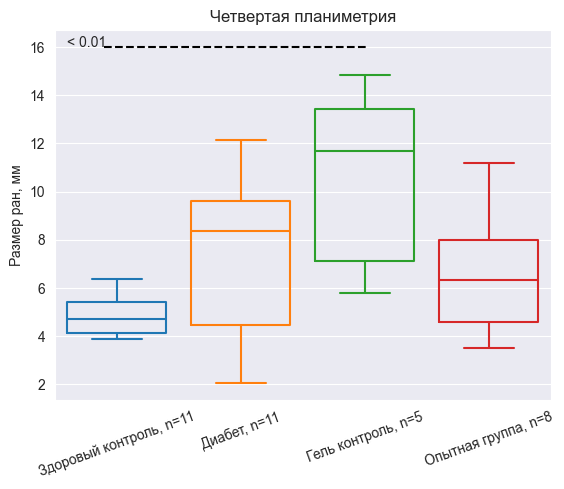

In [648]:
# Boxplot for first planimetry

plt.title("Четвертая планиметрия")
plt.ylabel('Размер ран, мм')
plt.xticks(np.arange(0, 3, step=1))  # Set label locations.
plt.xticks(np.arange(4), ['Здоровый контроль, n=11', 'Диабет, n=11', 'Гель контроль, n=5', 'Опытная группа, n=8'], rotation=20)

plt.axhline(y=16, xmin=0.1, xmax=0.63, linestyle='--', c='black')
plt.text(x=-0.4, y=16, s='< 0.01')

sns.boxplot(data=combined_df_4, fill=False, showmeans=False)
plt.show()

Оценка статистических показателей

In [649]:
# Normal distribution check
norm_rwod_4 = st.shapiro(rwod_3)
norm_rwd_4 = st.shapiro(rwd_3)
norm_cg_4 = st.shapiro(cg_3)
norm_tr_4 = st.shapiro(tr_3)
f'health: {norm_rwod_4.pvalue}, diabetes: {norm_rwd_4.pvalue}, gel: {norm_cg_4.pvalue}, treatment: {norm_tr_4.pvalue}'
# Distribution in samples is not normal

'health: 0.0012164526851847768, diabetes: 0.014118853025138378, gel: 0.0013179682428017259, treatment: 0.002025715308263898'

In [650]:
# Kruskal test for identification of differencies in samples
health_control_4 = sorted(np.array([4.037246965, 5.652686639, 4.713309519, 4.135753692, 3.864257248, 5.189774365, 5.015263327, 4.367949278, 4.086017793, 6.389980214, 5.844045366]))

diabetes_4 = sorted(np.array([9.050248967, 10.153472, 11.18221974, 12.14335812, 2.53426529, 8.64011472, 4.294271106, 7.061783755, 8.885900949, 4.076185303, 4.21467492]))

gel_4 = sorted(np.array([7.117216947, 11.70464549, 13.41987309, 14.82994904, 5.78004474]))

treatment_group_4 = sorted(np.array([4.487775327, 4.645112492, 7.812043617, 8.51480539, 7.108799607, 5.527119013, 3.503046899, 11.20083027]))

st.kruskal(health_control_4, diabetes_4, gel_4, treatment_group_4)


KruskalResult(statistic=9.70664502164503, pvalue=0.021231639279109187)

In [651]:
sp.posthoc_dunn([health_control_4, diabetes_4, gel_4, treatment_group_4], p_adjust='holm')


,1,2,3,4
1,1.000000,0.320304,0.014521,0.380212
2,0.320304,1.000000,0.349794,0.697259
3,0.014521,0.349794,1.000000,0.320304
4,0.380212,0.697259,0.320304,1.000000


In [652]:
st.mannwhitneyu(health_control_4, treatment_group_4)

MannwhitneyuResult(statistic=26.0, pvalue=0.15175570903125082)

# Пятая планиметрия

In [653]:
rwod_5 = pd.DataFrame(rat_wo_diabetes_5.reset_index().drop(columns='index').rename(columns={'planimetry_5': 'Health_control, n=6'}))
rwd_5 = pd.DataFrame(rat_w_diabetes_5.reset_index().drop(columns='index').rename(columns={'planimetry_5': 'Diabetes, n=5'}))
cg_5 = pd.DataFrame(control_gel_5.reset_index().drop(columns='index').rename(columns={'planimetry_5': 'Gel_control, n=5'}))
tr_5 = pd.DataFrame(treatment_5.reset_index().drop(columns='index').rename(columns={'planimetry_5': 'Treatment, n=4'}))

combined_df_5 = pd.concat([rwod_5, rwd_5, cg_5, tr_5], axis=1)
combined_df_5.replace(True, pd.NA, inplace=True)

# Сброс индексов после объединения
combined_df_5 = combined_df_5.reset_index(drop=True)

# Заменим значения True на NA для корректной статистики
combined_df_5.replace(True, pd.NA, inplace=True)
combined_df_5.head()

,"Health_control, n=6","Diabetes, n=5","Gel_control, n=5","Treatment, n=4"
0,<NA>,<NA>,<NA>,<NA>
1,<NA>,<NA>,<NA>,<NA>
2,<NA>,<NA>,<NA>,<NA>
3,<NA>,<NA>,<NA>,<NA>
4,<NA>,<NA>,<NA>,<NA>


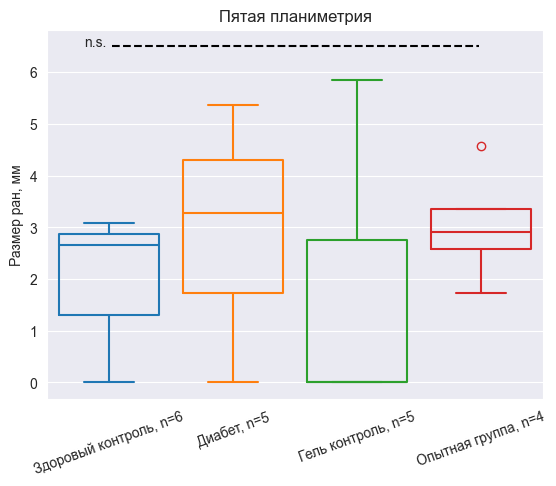

In [654]:
# Boxplot for first planimetry

plt.title("Пятая планиметрия")
plt.ylabel('Размер ран, мм')
plt.xticks(np.arange(0, 3, step=1))  # Set label locations.
plt.xticks(np.arange(4), ['Здоровый контроль, n=6', 'Диабет, n=5', 'Гель контроль, n=5', 'Опытная группа, n=4'], rotation=20)

plt.axhline(y=6.5, xmin=0.13, xmax=0.87, linestyle='--', c='black')
plt.text(x=-0.2, y=6.5, s='n.s.')

sns.boxplot(data=combined_df_5, fill=False)
plt.show()

In [655]:
# Normal distribution check
norm_rwod_4 = st.shapiro(rwod_3)
norm_rwd_4 = st.shapiro(rwd_3)
norm_cg_4 = st.shapiro(cg_3)
norm_tr_4 = st.shapiro(tr_3)
f'health: {norm_rwod_4.pvalue}, diabetes: {norm_rwd_4.pvalue}, gel: {norm_cg_4.pvalue}, treatment: {norm_tr_4.pvalue}'
# Distribution in samples is not normal

'health: 0.0012164526851847768, diabetes: 0.014118853025138378, gel: 0.0013179682428017259, treatment: 0.002025715308263898'

In [656]:
# Kruskal test for identification of differencies in samples
health_control_5 = sorted(np.array([0, 2.554376786, 0.895850306, 2.768567888, 2.913836965, 3.089122069]))
diabetes_5 = sorted(np.array([3,280709881, 5.370241191, 4.310851365, 1.720983277, 0]))
gel_5 = np.array([0, 5.854716646, 2.757964725, 0, 0])
treatment_group_5 = sorted(np.array([2,86823144, 2.954646562, 1.728000944, 4.581741665]))

st.kruskal(health_control_5, diabetes_5, gel_5, treatment_group_5)

KruskalResult(statistic=3.326099371787545, pvalue=0.34402658632671856)

# Оценка ран по площади

In [657]:
square_df = pd.read_excel('./Гели-кожа, цифры.xlsx', sheet_name='Square')
square_df = square_df.rename(columns={'Группа':'group'})
square_df = square_df.drop([71, 72, 73])

In [658]:
square = square_df.groupby('group').agg(
    {'planimetry_1': 'mean', 'planimetry_2': 'mean', 'planimetry_3': 'mean', 'planimetry_4': 'mean', 'planimetry_5': 'mean'})
square

,planimetry_1,planimetry_2,planimetry_3,planimetry_4,planimetry_5
group,,,,,
ГКЦ,380.717000,285.198733,208.486500,97.51,6.575800
ГОЦ,349.410389,333.146000,163.980750,38.66725,8.033500
СДК_minus,377.236056,255.123875,88.995875,18.936364,4.318167
СДК_plus,387.475176,320.131500,151.266625,51.161909,9.600200


In [659]:
transponced_square = square.transpose().reset_index()
transponced_square = transponced_square.rename(columns={'group':'Группа', 'ГКЦ':'Гель-контроль', 'ГОЦ':'Гель-опыт', 'СДК_minus':'Здоровый контроль', 'СДК_plus':'Диабет контроль'})

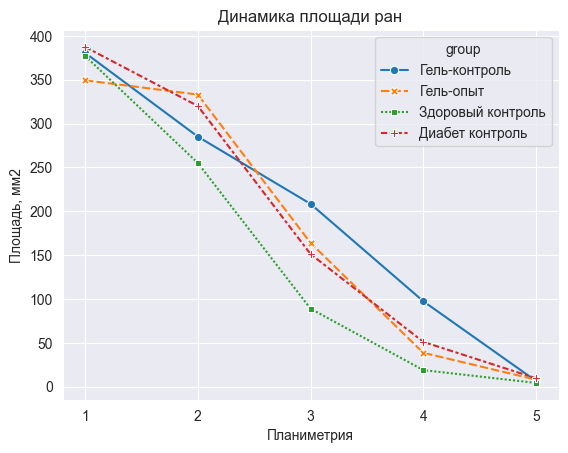

In [660]:
plt.title('Динамика площади ран')
labels = [1,2,3,4,5]
plt.xticks(np.arange(0, 5, step=1), labels=labels)
plt.xlabel('Планиметрия')
plt.ylabel('Площадь, мм2')

values = ['Гель контроль', 'Опыт', 'Здоровый контроль', 'Диабет']
sns.lineplot(data=transponced_square, markers=True)
plt.show()

# Первая планиметрия (площадь)

In [661]:
# Prepare data for first planimetry
square_wo_diabetes_1 = square_df[square_df['group'] == 'СДК_minus']['planimetry_1'].reset_index().drop(columns='index').rename(columns={'planimetry_1': 'Health_control'})
square_w_diabetes_1 = square_df[square_df['group'] == 'СДК_plus']['planimetry_1'].reset_index().drop(columns='index').rename(columns={'planimetry_1': 'Diabetes'})
square_gel_1 = square_df[square_df['group'] == 'ГКЦ']['planimetry_1'].reset_index().drop(columns='index').rename(columns={'planimetry_1': 'Gel_control'})
square_treatment_1 = square_df[square_df['group'] == 'ГОЦ']['planimetry_1'].reset_index().drop(columns='index').rename(columns={'planimetry_1': 'Treatment'})
square_planimetry_1 = [square_wo_diabetes_1, square_w_diabetes_1, square_gel_1, square_treatment_1]
plani_square_1 = pd.concat(square_planimetry_1, axis=1)
plani_square_1

,Health_control,Diabetes,Gel_control,Treatment
0,291.743,430.069,428.363,343.947
1,271.908,427.249,448.774,256.926
2,334.725,399.905,454.898,317.121
3,392.590,471.965,331.622,364.336
4,325.591,378.526,307.722,347.538
5,347.945,566.546,320.027,363.539
6,361.481,387.701,NaN,376.762
7,376.696,430.014,484.058,256.040
8,455.568,356.195,414.189,277.216
9,342.299,346.818,391.711,327.244


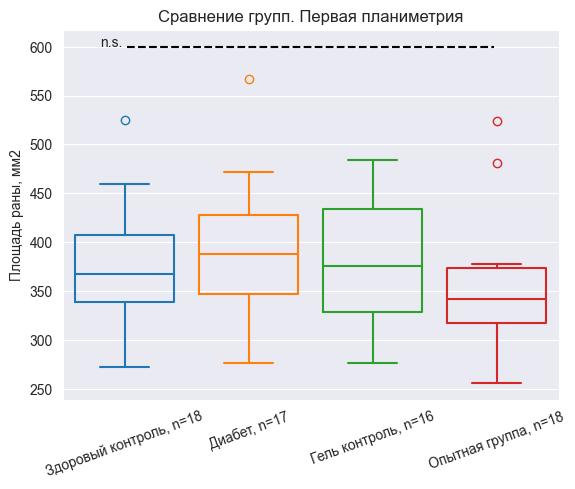

In [662]:
# First planimetry boxplot

plt.xticks(np.arange(0, 3, step=1))  # Set label locations.
plt.xticks(np.arange(4), [f'Здоровый контроль, n={len(plani_square_1["Health_control"])}', f'Диабет, n={len(plani_square_1["Diabetes"])-1}', f'Гель контроль, n={len(plani_square_1["Gel_control"])-2}', f'Опытная группа, n={len(plani_square_1["Treatment"])}'], rotation=20)  # Set text labels.
plt.title('Сравнение групп. Первая планиметрия')
plt.ylabel('Площадь раны, мм2')
plt.axhline(y=600, xmin=0.13, xmax=0.87, linestyle='--', c='black')
plt.text(x=-0.2, y=600, s='n.s.')

sns.boxplot(data=plani_square_1, fill=False)
plt.show()

In [663]:
plani_hc_1 = sorted([291.743, 271.908, 334.725, 392.59, 325.591, 347.945, 361.481, 376.696, 455.568, 342.299, 337.921, 370.955, 422.447, 410.066, 524.518, 400.76, 459.375, 363.661])
plani_diabetes_1 = sorted([430.069, 427.249, 399.905, 471.965, 378.526, 566.546, 387.701, 430.014, 356.195, 346.818, 395.272, 331.81, 333.454, 392.244, 277.725, 276.323, 385.262])
plani_gc_1 = sorted([428.36, 448.77, 454.89, 331.62, 307.72, 320.02, 484.05, 414.18, 391.1, 344.08, 276.32, 369.57, 345.39, 309.6, 382.15, 482.88])
plani_tr_1 = sorted([343.947, 256.926, 317.121, 364.336, 347.538, 363.539, 376.762, 256.040, 277.216, 327.244, 523.723, 377.304, 377.227, 326.565, 314.104, 480.867, 340.357, 318.571])

st.kruskal(plani_hc_1[:-1], plani_diabetes_1[:-1], plani_gc_1, plani_tr_1[:-2])

KruskalResult(statistic=8.293264088852311, pvalue=0.04032413288250472)

In [664]:
sp.posthoc_dunn([plani_hc_1[:-1], plani_diabetes_1[:-1], plani_gc_1, plani_tr_1[:-2]], p_adjust='holm')

,1,2,3,4
1,1.000000,1.000000,1.000000,0.168392
2,1.000000,1.000000,1.000000,0.057618
3,1.000000,1.000000,1.000000,0.104629
4,0.168392,0.057618,0.104629,1.000000


# Вторая планиметрия

In [665]:
# Prepare data for second planimetry
square_wo_diabetes_2 = square_df[square_df['group'] == 'СДК_minus']['planimetry_2'].reset_index().drop(columns='index').rename(columns={'planimetry_2': 'Health_control'})
square_w_diabetes_2 = square_df[square_df['group'] == 'СДК_plus']['planimetry_2'].reset_index().drop(columns='index').rename(columns={'planimetry_2': 'Diabetes'})
square_gel_2 = square_df[square_df['group'] == 'ГКЦ']['planimetry_2'].reset_index().drop(columns='index').rename(columns={'planimetry_2': 'Gel_control'})
square_treatment_2 = square_df[square_df['group'] == 'ГОЦ']['planimetry_2'].reset_index().drop(columns='index').rename(columns={'planimetry_2': 'Treatment'})
square_planimetry_2 = [square_wo_diabetes_2, square_w_diabetes_2, square_gel_2, square_treatment_2]
plani_square_2 = pd.concat(square_planimetry_2, axis=1)
plani_square_2

,Health_control,Diabetes,Gel_control,Treatment
0,NaN,212.628,284.252,431.265
1,213.802,481.803,310.430,298.295
2,NaN,199.093,257.544,NaN
3,364.671,402.817,222.703,NaN
4,273.138,264.404,198.797,329.637
5,230.254,458.798,219.498,253.257
6,391.622,305.255,177.782,292.982
7,284.081,410.007,376.993,NaN
8,155.154,355.272,438.598,303.744
9,197.644,251.091,203.356,212.867


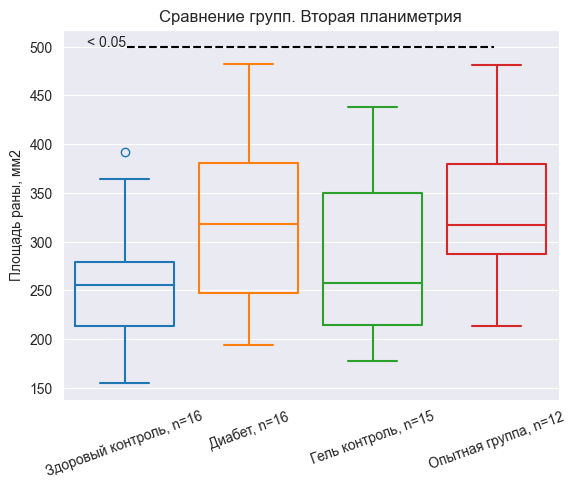

In [666]:
# Second planimetry boxplot

plt.xticks(np.arange(0, 3, step=1))  # Set label locations.
plt.xticks(np.arange(4), [f'Здоровый контроль, n={len(plani_square_2["Health_control"])-2}', f'Диабет, n={len(plani_square_2["Diabetes"])-2}', f'Гель контроль, n={len(plani_square_2["Gel_control"])-3}', f'Опытная группа, n={len(plani_square_2["Treatment"])-6}'], rotation=20)  # Set text labels.
plt.yticks(np.arange(150, 550, step=50))
plt.title('Сравнение групп. Вторая планиметрия')
plt.ylabel('Площадь раны, мм2')
plt.axhline(y=500, xmin=0.13, xmax=0.87, linestyle='--', c='black')
plt.text(x=-0.3, y=500, s='< 0.05')

sns.boxplot(data=plani_square_2, fill=False)
plt.show()

In [667]:
plani_hc_2 = sorted([213.802, 364.671, 273.138, 230.254, 391.622, 284.081, 155.154,
                    197.644, 226.64, 243.436, 294.761, 171.313, 213.119, 277.098, 277.398, 267.851])
plani_diabetes_2 = sorted([212.628, 481.803, 199.093, 402.817, 264.404, 458.798, 305.255,
                          410.007, 355.272, 251.091, 236.237, 330.224, 372.963, 305.534, 342.461, 193.517])
plani_gc_2 = sorted([284.252, 310.43, 257.544, 222.703, 198.797, 219.498, 177.782,
                    376.993, 438.598, 203.356, 209.605, 431.846, 323.723, 236.379, 386.475])
plani_tr_2 = sorted([431.265, 298.295, 329.637, 253.257, 292.982, 303.744, 212.867, 376.438, 388.721, 270.6, 359.079, 480.867])

st.kruskal(plani_hc_2[:-1], plani_diabetes_2, plani_gc_2, plani_tr_2)

KruskalResult(statistic=8.731151373465792, pvalue=0.033087401195573005)

In [668]:
sp.posthoc_dunn([plani_hc_2[:-1], plani_diabetes_2, plani_gc_2, plani_tr_2], p_adjust='holm')

,1,2,3,4
1,1.000000,0.108835,0.72884,0.047178
2,0.108835,1.000000,0.72884,0.728840
3,0.728840,0.728840,1.00000,0.477860
4,0.047178,0.728840,0.47786,1.000000


# Третья планиметрия

In [669]:
square_wo_diabetes_3 = square_df[square_df['group'] == 'СДК_minus']['planimetry_3'].reset_index().drop(columns='index').rename(columns={'planimetry_3': 'Health_control'})
square_w_diabetes_3 = square_df[square_df['group'] == 'СДК_plus']['planimetry_3'].reset_index().drop(columns='index').rename(columns={'planimetry_3': 'Diabetes'})
square_gel_3 = square_df[square_df['group'] == 'ГКЦ']['planimetry_3'].reset_index().drop(columns='index').rename(columns={'planimetry_3': 'Gel_control'})
square_treatment_3 = square_df[square_df['group'] == 'ГОЦ']['planimetry_3'].reset_index().drop(columns='index').rename(columns={'planimetry_3': 'Treatment'})
square_planimetry_3 = [square_wo_diabetes_3, square_w_diabetes_3, square_gel_3, square_treatment_3]
plani_square_3 = pd.concat(square_planimetry_3, axis=1)
plani_square_3.head()

,Health_control,Diabetes,Gel_control,Treatment
0,NaN,77.794,NaN,130.121
1,100.650,NaN,NaN,115.629
2,73.044,130.767,NaN,NaN
3,97.937,162.289,NaN,113.337
4,85.429,76.999,NaN,NaN


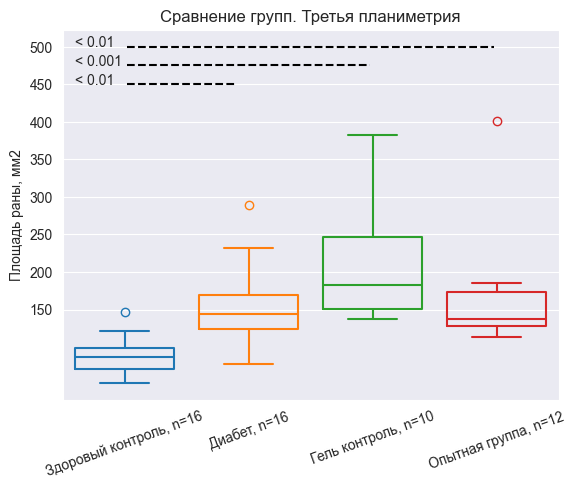

In [670]:
# Third planimetry boxplot

plt.xticks(np.arange(0, 3, step=1))  # Set label locations.
plt.xticks(np.arange(4), [f'Здоровый контроль, n={len(plani_square_3["Health_control"])-2}', f'Диабет, n={len(plani_square_3["Diabetes"])-2}', f'Гель контроль, n={len(plani_square_3["Gel_control"])-8}', f'Опытная группа, n={len(plani_square_3["Treatment"])-6}'], rotation=20)  # Set text labels.
plt.yticks(np.arange(150, 550, step=50))
plt.title('Сравнение групп. Третья планиметрия')
plt.ylabel('Площадь раны, мм2')

plt.axhline(y=500, xmin=0.13, xmax=0.87, linestyle='--', c='black')
plt.text(x=-0.4, y=500, s='< 0.01')

plt.axhline(y=475, xmin=0.13, xmax=0.62, linestyle='--', c='black')
plt.text(x=-0.4, y=475, s='< 0.001')

plt.axhline(y=450, xmin=0.13, xmax=0.35, linestyle='--', c='black')
plt.text(x=-0.4, y=450, s='< 0.01')

sns.boxplot(data=plani_square_3, fill=False)
plt.show()

In [671]:
plani_hc_3 = sorted([100.65, 73.044, 97.937, 85.429, 120.869, 52.607, 146.187,
                    87.434, 82.82, 66.961, 103.436, 93.679, 64.952, 66.681, 82.552, 98.696])
plani_diabetes_3 = sorted([77.794, 130.767, 162.289, 76.999, 167.677, 197.327, 232.231,
                          289.511, 86.563, 138.527, 116.36, 157.074, 127.16, 135.187, 150.24, 174.56])
plani_gc_3 = sorted([137.917, 292.629, 264.958, 381.972,
                    193.548, 145.893, 163.137, 184.031, 181.269, 139.511])
plani_tr_3 = sorted([130.121, 115.629, 113.337, 142.537, 129.969,
                    185.302, 122.108, 131.75, 148.536, 174.422, 172.824, 401.234])

st.kruskal(plani_hc_3[:-1], plani_diabetes_3[:-1], plani_gc_3, plani_tr_3[:-1])

KruskalResult(statistic=29.409132044426173, pvalue=1.8371639737560733e-06)

In [672]:
sp.posthoc_dunn([plani_hc_3[:-1], plani_diabetes_3[:-1], plani_gc_3, plani_tr_3[:-1]], p_adjust='holm')

,1,2,3,4
1,1.000000,0.002325,0.000001,0.003316
2,0.002325,1.000000,0.123111,0.901916
3,0.000001,0.123111,1.000000,0.144652
4,0.003316,0.901916,0.144652,1.000000


# Четвертая планиметрия

In [673]:
square_wo_diabetes_4 = square_df[square_df['group'] == 'СДК_minus']['planimetry_4'].reset_index().drop(columns='index').rename(columns={'planimetry_4': 'Health_control'})
square_w_diabetes_4 = square_df[square_df['group'] == 'СДК_plus']['planimetry_4'].reset_index().drop(columns='index').rename(columns={'planimetry_4': 'Diabetes'})
square_gel_4 = square_df[square_df['group'] == 'ГКЦ']['planimetry_4'].reset_index().drop(columns='index').rename(columns={'planimetry_4': 'Gel_control'})
square_treatment_4 = square_df[square_df['group'] == 'ГОЦ']['planimetry_4'].reset_index().drop(columns='index').rename(columns={'planimetry_4': 'Treatment'})
square_planimetry_4 = [square_wo_diabetes_4, square_w_diabetes_4, square_gel_4, square_treatment_4]
plani_square_4 = pd.concat(square_planimetry_4, axis=1)
plani_square_4

,Health_control,Diabetes,Gel_control,Treatment
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,64.297,NaN,NaN
6,12.795,80.928,39.764,15.81
7,25.083,98.158,107.544,NaN
8,17.439,115.757,141.373,16.938
9,13.427,3.31,172.643,47.907


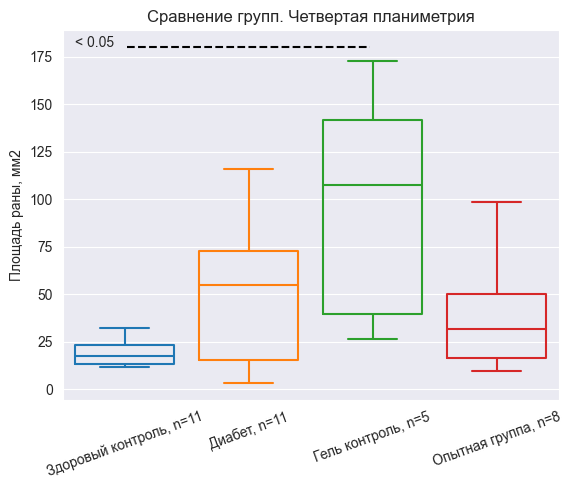

In [674]:
# Forth planimetry boxplot

plt.xticks(np.arange(0, 3, step=1))  # Set label locations.
plt.xticks(np.arange(4), [f'Здоровый контроль, n={len(plani_square_4["Health_control"])-7}', f'Диабет, n={len(plani_square_4["Diabetes"])-7}', f'Гель контроль, n={len(plani_square_4["Gel_control"])-13}', f'Опытная группа, n={len(plani_square_4["Treatment"])-10}'], rotation=20)  # Set text labels.
plt.yticks(np.arange(0, 500, step=25))
plt.title('Сравнение групп. Четвертая планиметрия')
plt.ylabel('Площадь раны, мм2')

plt.axhline(y=180, xmin=0.13, xmax=0.62, linestyle='--', c='black')
plt.text(x=-0.4, y=180, s='< 0.05')

sns.boxplot(data=plani_square_4, fill=False)
plt.show()

In [675]:
plani_hc_4 = sorted([12.795, 25.083, 17.439, 13.427, 11.722, 13.106, 21.143, 14.977, 19.745, 32.053, 26.81])
plani_diabetes_4 = sorted([64.297, 80.928, 98.158, 115.757, 3.31, 54.916, 14.476, 39.147, 61.983, 13.043, 16.766, ])
plani_gc_4 = sorted([39.764, 107.544, 141.373, 172.643, 26.226])
plani_tr_4 = sorted([15.81, 16.938, 47.907, 56.914, 39.67, 23.981, 9.633, 98.485])

st.kruskal(plani_hc_4, plani_diabetes_4, plani_gc_4, plani_tr_4)


KruskalResult(statistic=9.86248917748918, pvalue=0.01977193154762734)

In [676]:
sp.posthoc_dunn([plani_hc_4[:-1], plani_diabetes_4[:-1], plani_gc_4, plani_tr_4[:-1]], p_adjust='holm')

,1,2,3,4
1,1.000000,0.344478,0.011827,0.583990
2,0.344478,1.000000,0.344478,0.614472
3,0.011827,0.344478,1.000000,0.223321
4,0.583990,0.614472,0.223321,1.000000


# Пятая планиметрия

In [677]:
square_wo_diabetes_5 = square_df[square_df['group'] == 'СДК_minus']['planimetry_5'].reset_index().drop(columns='index').rename(columns={'planimetry_5': 'Health_control'})
square_w_diabetes_5 = square_df[square_df['group'] == 'СДК_plus']['planimetry_5'].reset_index().drop(columns='index').rename(columns={'planimetry_5': 'Diabetes'})
square_gel_5 = square_df[square_df['group'] == 'ГКЦ']['planimetry_5'].reset_index().drop(columns='index').rename(columns={'planimetry_5': 'Gel_control'})
square_treatment_5 = square_df[square_df['group'] == 'ГОЦ']['planimetry_5'].reset_index().drop(columns='index').rename(columns={'planimetry_5': 'Treatment'})
square_planimetry_5 = [square_wo_diabetes_5, square_w_diabetes_5, square_gel_5, square_treatment_5]
plani_square_5 = pd.concat(square_planimetry_5, axis=1)
plani_square_5

,Health_control,Diabetes,Gel_control,Treatment
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


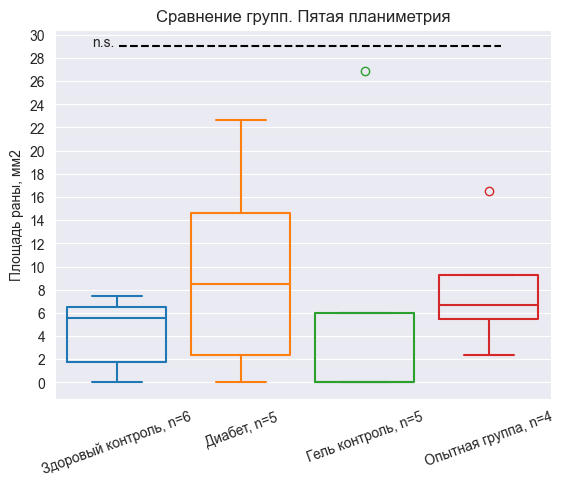

In [678]:
# Fifth planimetry boxplot

plt.xticks(np.arange(0, 3, step=1))  # Set label locations.
plt.xticks(np.arange(4), [f'Здоровый контроль, n={len(plani_square_4["Health_control"])-12}', f'Диабет, n={len(plani_square_4["Diabetes"])-13}', f'Гель контроль, n={len(plani_square_4["Gel_control"])-13}', f'Опытная группа, n={len(plani_square_4["Treatment"])-14}'], rotation=20)  # Set text labels.
plt.yticks(np.arange(0, 150, step=2))
plt.title('Сравнение групп. Пятая планиметрия')
plt.ylabel('Площадь раны, мм2')

plt.axhline(y=29, xmin=0.13, xmax=0.9, linestyle='--', c='black')
plt.text(x=-0.2, y=29, s='n.s.')

sns.boxplot(data=plani_square_5, fill=False, whis=1.5)
plt.show()

In [679]:
plani_hc_5 = sorted([0, 5.122, 0.63, 6.017, 6.65, 7.49])
plani_diabetes_5 = sorted([8.449, 22.639, 14.588, 2.325, 0])
plani_gc_5 = sorted([0, 26.908, 5.971, 0, 0])
plani_tr_5 = sorted([6.458, 6.853, 2.344, 16.479])

st.kruskal(plani_hc_5, plani_diabetes_5, plani_gc_5, plani_tr_5)

KruskalResult(statistic=2.480152671755718, pvalue=0.478888620646307)

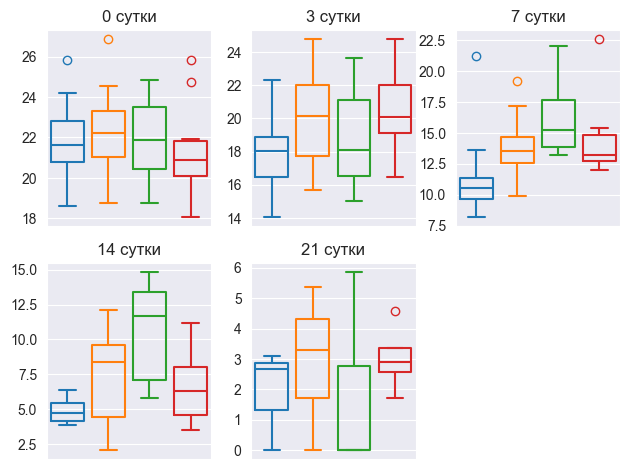

In [680]:
fig, ax = plt.subplots(2, 3)
fig.delaxes(ax[1, 2])



sns.boxplot(ax=ax[0,0], data=combined_df_1, fill=False)
ax[0,0].set_title('0 сутки')

sns.boxplot(ax=ax[0,1], data=combined_df_2, fill=False)
ax[0,1].set_title('3 сутки')

sns.boxplot(ax=ax[0,2], data=combined_df_3, fill=False)
ax[0,2].set_title('7 сутки')

sns.boxplot(ax=ax[1,0], data=combined_df_4, fill=False)
ax[1,0].set_title('14 сутки')

sns.boxplot(ax=ax[1,1], data=combined_df_5, fill=False, whis=1.5)
ax[1,1].set_title('21 сутки')

for axes in ax.flat:
    axes.set_xticks([])
    axes.set_xlabel('')

plt.tight_layout()
plt.show()

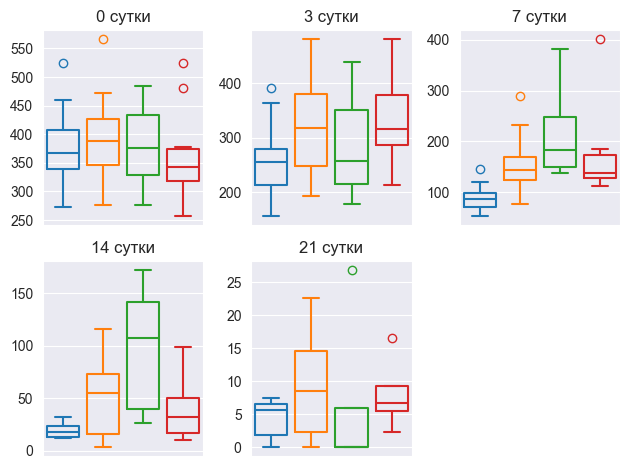

In [681]:
fig, ax = plt.subplots(2, 3)
fig.delaxes(ax[1, 2])



sns.boxplot(ax=ax[0,0], data=plani_square_1, fill=False)
ax[0,0].set_title('0 сутки')

sns.boxplot(ax=ax[0,1], data=plani_square_2, fill=False)
ax[0,1].set_title('3 сутки')

sns.boxplot(ax=ax[0,2], data=plani_square_3, fill=False)
ax[0,2].set_title('7 сутки')

sns.boxplot(ax=ax[1,0], data=plani_square_4, fill=False)
ax[1,0].set_title('14 сутки')

sns.boxplot(ax=ax[1,1], data=plani_square_5, fill=False, whis=1.5)
ax[1,1].set_title('21 сутки')

for axes in ax.flat:
    axes.set_xticks([])
    axes.set_xlabel('')

plt.tight_layout()
plt.show()